
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Filter Tropical Cyclones (TCs) that affect the site and their parameterization

inputs required: 
  * Storm tracks records (ibtracks file)
  * longitude and latitude of the site (location of the waves record)
  * radius for TCs selection (º)

in this notebook:
  * selection of TCs affecting the site (two radiouses of influence)
  * parameterization of TC tracks based on forward speed, mean pressure, and angles of entrance
  * analysis of changes in category between radiouses


### Workflow:

<div>
<img src="resources/nb01_05.png" width="300px">
</div>


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import xarray as xr
import numpy as np

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.storms import Extract_Circle, GetCategoryChangeProbs

from teslakit.plotting.storms import Plot_TCs_TracksParams, \
Plot_TCs_HistoricalTracks, Plot_TCs_HistoricalTracks_Category, Plot_Category_Change



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/anacrueda/Documents/Proyectos/TESLA/data'
db = Database(p_data)

# set site
db.SetSite('ROI')


In [3]:
# --------------------------------------
# load data and set parameters

TCs_wmo = db.Load_TCs_noaa()  # noaa Allstorms.ibtracs_wmo

p_new = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/MAJURO/TCs/Allstorms.ibtracs_wmo.v03r10.nc'
TCs_old = xr.open_dataset(p_new)

# wave point longitude and latitude
pnt_lon = 167.5
pnt_lat = 9.75

# radius for TCs selection (º)
r1 = 14
r2 = 4


In [4]:
print(TCs_wmo)
print(TCs_old)

<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 13407)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: date_time, quadrant, storm
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu        (storm) |S128 ...
    source_bom        (storm) |S128 ...
    source_nad        (storm) |S128 ...
    source_wel        (storm) |S128 ...
  


## Historical TCs - extraction

In [5]:
# --------------------------------------
# Select Historical TCs inside circle

# dictionary with needed variable names 
d_vns = {
    'longitude': 'lon',
    'latitude': 'lat',
    'time': 'time',
    'pressure': 'wmo_pres',
}

# Select TCs that crosses a circular area R1
TCs_r1_tracks, TCs_r1_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r1, d_vns)

# dictionary with needed variable names 
#d_vns_old = {
 #   'longitude': 'lon_wmo',
 #   'latitude': 'lat_wmo',
 #   'time': 'time_wmo',
 #   'pressure': 'pres_wmo',
#}

# Select TCs that crosses a circular area R1
#TCs_r1_tracks_old, TCs_r1_params_old = Extract_Circle(TCs_old, pnt_lon, pnt_lat, r1, d_vns_old)

print(TCs_r1_tracks)

# Select TCs that crosses a circular area R2
TCs_r2_tracks, TCs_r2_params = Extract_Circle(TCs_wmo, pnt_lon, pnt_lat, r2, d_vns)
print(TCs_r2_tracks)

# store data
db.Save_TCs_r1_hist(TCs_r1_tracks, TCs_r1_params)
db.Save_TCs_r2_hist(TCs_r2_tracks, TCs_r2_params)


<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 335)
Coordinates:
    time              (storm, date_time) datetime64[ns] 1951-03-18T06:00:00 ... NaT
    lat               (storm, date_time) float32 5.7 5.845132 6.0 ... nan nan
    lon               (storm, date_time) float32 158.3 158.8612 ... nan nan
  * storm             (storm) int64 5437 5444 5581 5585 ... 13204 13230 13234
Dimensions without coordinates: date_time, quadrant
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu       

<xarray.Dataset>
Dimensions:           (date_time: 360, quadrant: 4, storm: 75)
Coordinates:
    time              (storm, date_time) datetime64[ns] 1951-03-18T06:00:00 ... NaT
    lat               (storm, date_time) float32 5.7 5.845132 6.0 ... nan nan
    lon               (storm, date_time) float32 158.3 158.8612 ... nan nan
  * storm             (storm) int64 5437 5611 5621 5826 ... 12830 12852 13204
Dimensions without coordinates: date_time, quadrant
Data variables:
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 ...
    subbasin          (storm, date_time) |S2 ...
    name              (storm) |S128 ...
    source_usa        (storm) |S128 ...
    source_jma        (storm) |S128 ...
    source_cma        (storm) |S128 ...
    source_hko        (storm) |S128 ...
    source_new        (storm) |S128 ...
    source_reu        

In [13]:
print(TCs_r1_tracks.time[-1,:])

<xarray.DataArray 'time' (date_time: 360)>
array(['2018-11-07T00:00:00.000000000', '2018-11-07T03:00:00.000000000',
       '2018-11-07T06:00:00.000000000', ...,                           'NaT',
                                 'NaT',                           'NaT'],
      dtype='datetime64[ns]')
Coordinates:
    time     (date_time) datetime64[ns] 2018-11-07 2018-11-07T03:00:00 ... NaT
    lat      (date_time) float32 7.3 7.312511 7.3000007 ... nan nan nan
    lon      (date_time) float32 179.0 178.71002 178.39998 ... nan nan nan
    storm    int64 13234
Dimensions without coordinates: date_time
Attributes:
    long_name:              time
    standard_name:          time
    description:            Nominally, time steps are 3 hourly, but can be mo...
    Note:                   Variable:time can be missing since the tracks are...
    coverage_content_type:  physicalMeasurement


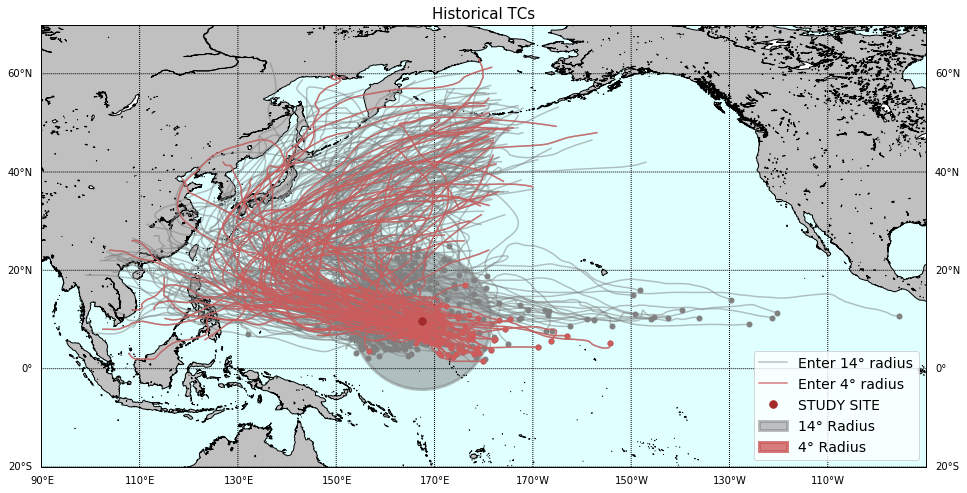

In [6]:
# Plot storm tracks world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, r2,
);


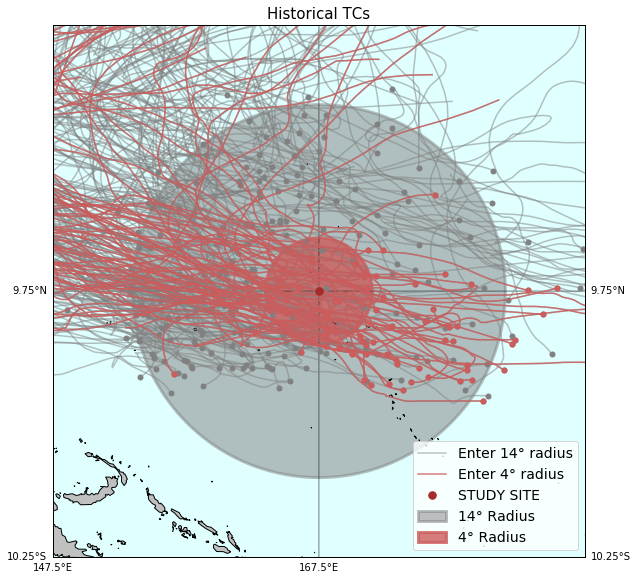

In [7]:
# zoom map

r_zoom = 20

Plot_TCs_HistoricalTracks(
    TCs_r1_tracks, TCs_r2_tracks,
    pnt_lon-r_zoom, pnt_lon+r_zoom, pnt_lat-r_zoom, pnt_lat+r_zoom,
    pnt_lon, pnt_lat, r1, r2,
);

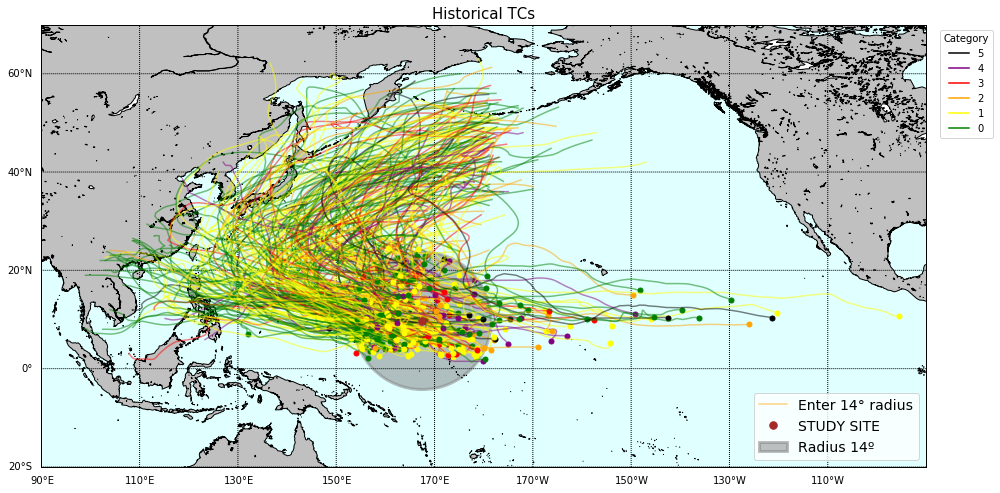

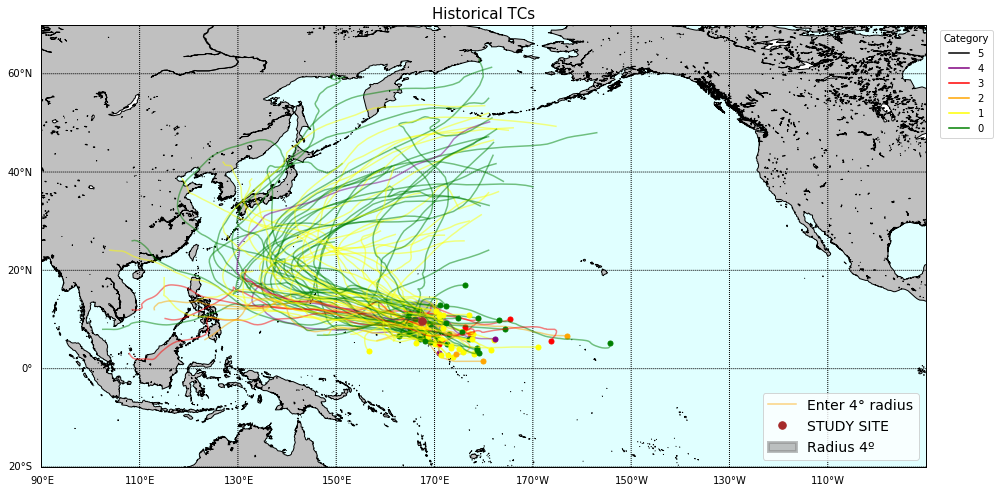

In [8]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -20, 70

# r1
Plot_TCs_HistoricalTracks_Category(
    TCs_r1_tracks, TCs_r1_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1,
);

# r2
Plot_TCs_HistoricalTracks_Category(
    TCs_r2_tracks, TCs_r2_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2,
);

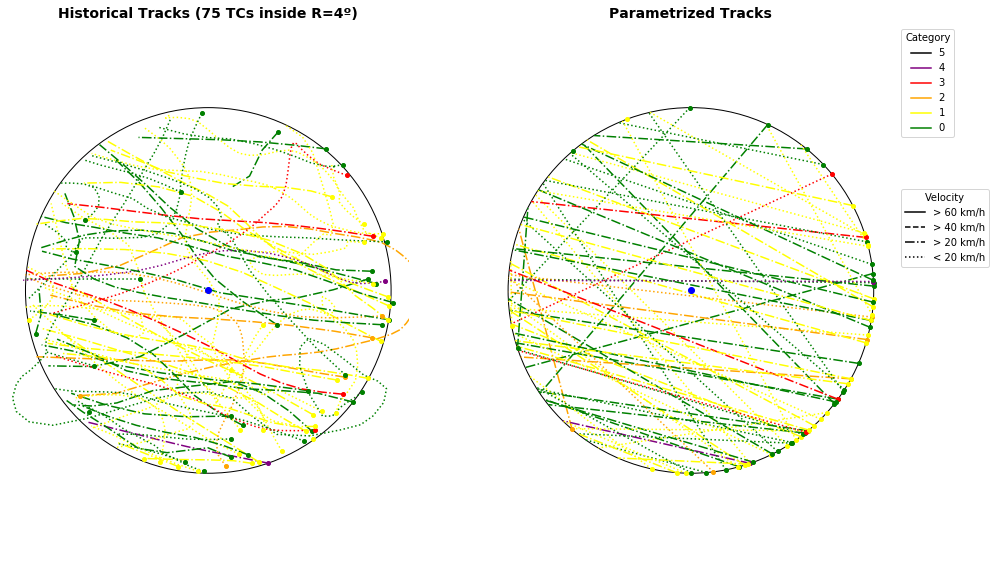

In [9]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)

Plot_TCs_TracksParams(TCs_r2_tracks, TCs_r2_params);


In [10]:
# Calculate Historical TCs category change probabilities

categ_cp = GetCategoryChangeProbs(TCs_r1_params, TCs_r2_params)
print(categ_cp)


<xarray.Dataset>
Dimensions:                  (category: 6)
Coordinates:
  * category                 (category) int64 0 1 2 3 4 5
Data variables:
    category_change_count    (category, category) int64 8 15 6 3 1 ... 0 0 0 0 0
    category_change_probs    (category, category) float64 0.06299 0.123 ... 0.0
    category_nochange_probs  (category) float64 0.937 0.7541 ... 0.5909 0.6667
    category_change_cumsum   (category, category) float64 0.06299 ... 0.3333


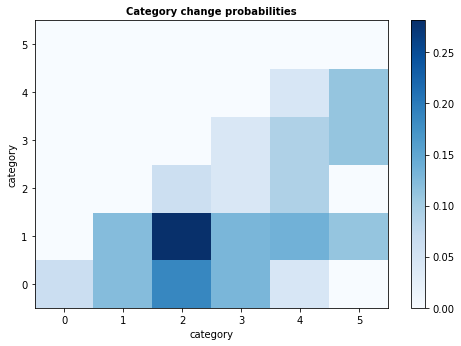

In [11]:
# Plot category change probabilities

Plot_Category_Change(categ_cp);
